# 第6章　PyTorchを使ったリカレントネットワーク





In [1]:
!pip install torchvision==0.2.1
!pip install pillow==4.2.0

    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 519.5MB 32kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x587f4000 @  0x7f74cb9ee1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 2.0MB 3.7MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 5.8MB 921kB/s 
  Found existing installation: Pillow 5.2.0
    Uninstalling Pillow-5.2.0:
      Successfully uninstalled Pillow-5.2.0


In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
torch.__version__

'0.4.1'

# シーケンスの取り扱い

# 多対１のリカレントニューラルネット

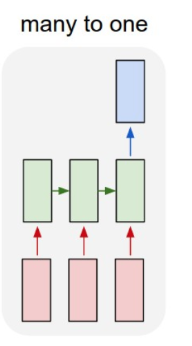

In [2]:
import torch
import torch.nn as nn

batch_size = 20
time_steps = 10
input_size = 2
num_classes = 2

net = nn.LSTM(input_size, num_classes, num_layers=2, batch_first=True)
input_seq = torch.randn(batch_size, time_steps, input_size)
print("input_seq：", input_seq.size()) #10シーケンスの2次元データ、バッチは20。
output_seq, _ = net(input_seq)
out = output_seq[:, -1, :]
print("output：", out.size())

input_seq： torch.Size([20, 10, 2])
output： torch.Size([20, 2])


In [3]:
import torch
import torch.nn as nn

batch_size = 20
time_steps = 10
input_size = 2
hidden_size = 2
num_classes = 2

net = nn.LSTMCell(input_size, hidden_size)
input_seq = torch.randn(time_steps, batch_size, input_size)
print("input_seq：", input_seq.size()) #10シーケンスの2次元データ、バッチは20。
#隠れ状態の初期化
hx = torch.randn(batch_size, hidden_size)
cx = torch.randn(batch_size, hidden_size)
output = []
#10シーケンス分ループします。
for i in range(time_steps):
    hx, cx = net(input_seq[i], (hx, cx))
    output.append(hx)
#最終シーケンスの出力値
print("output：", output[:-1][0].size())

input_seq： torch.Size([10, 20, 2])
output： torch.Size([20, 2])


# 多対多のリカレントニューラルネット

In [163]:
import torch
import torch.nn as nn

batch_size = 20
time_steps = 10
input_size = 2
num_classes = 2

net = nn.LSTM(input_size, num_classes, num_layers=2, batch_first=True)
input_seq = torch.randn(batch_size, time_steps, input_size)
print("input_seq：", input_seq.size()) #10シーケンスの2次元データ、バッチは20。
output_seq, (h_n, c_n) = net(input_seq)
#シーケンスを回す
for i in range(time_steps):
    print(" time {time}".format(time=i))    
    indices = torch.tensor([i])
    output = torch.index_select(output_seq, 1, indices)
    output = torch.squeeze(output)
    print("output：", output.size())

input_seq： torch.Size([20, 10, 2])
 time 0
output： torch.Size([20, 2])
 time 1
output： torch.Size([20, 2])
 time 2
output： torch.Size([20, 2])
 time 3
output： torch.Size([20, 2])
 time 4
output： torch.Size([20, 2])
 time 5
output： torch.Size([20, 2])
 time 6
output： torch.Size([20, 2])
 time 7
output： torch.Size([20, 2])
 time 8
output： torch.Size([20, 2])
 time 9
output： torch.Size([20, 2])


In [139]:
import torch
import torch.nn as nn

batch_size = 20
time_steps = 10
input_size = 2
hidden_size = 2
num_classes = 2

net = nn.LSTMCell(input_size, hidden_size)
input_seq = torch.randn(time_steps, batch_size, input_size)
print("input_seq：", input_seq.size()) #10シーケンスの2次元データ、バッチは20。
#隠れ状態の初期化
hx = torch.randn(batch_size, hidden_size)
cx = torch.randn(batch_size, hidden_size)
output = []
#10シーケンス分ループします。
for i in range(time_steps):
    hx, cx = net(input_seq[i], (hx, cx))
    output.append(hx)

#シーケンスを回す
for i in range(len(output)):
    print(" time {time}".format(time=i))
    print("output：", output[i][:].size())

input_seq： torch.Size([10, 20, 2])
 time 0
output： torch.Size([20, 2])
 time 1
output： torch.Size([20, 2])
 time 2
output： torch.Size([20, 2])
 time 3
output： torch.Size([20, 2])
 time 4
output： torch.Size([20, 2])
 time 5
output： torch.Size([20, 2])
 time 6
output： torch.Size([20, 2])
 time 7
output： torch.Size([20, 2])
 time 8
output： torch.Size([20, 2])
 time 9
output： torch.Size([20, 2])
